In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer# TEXT PROCESSING
import missingno as mns # CHECKING FOR MISSINGG
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<Axes: >

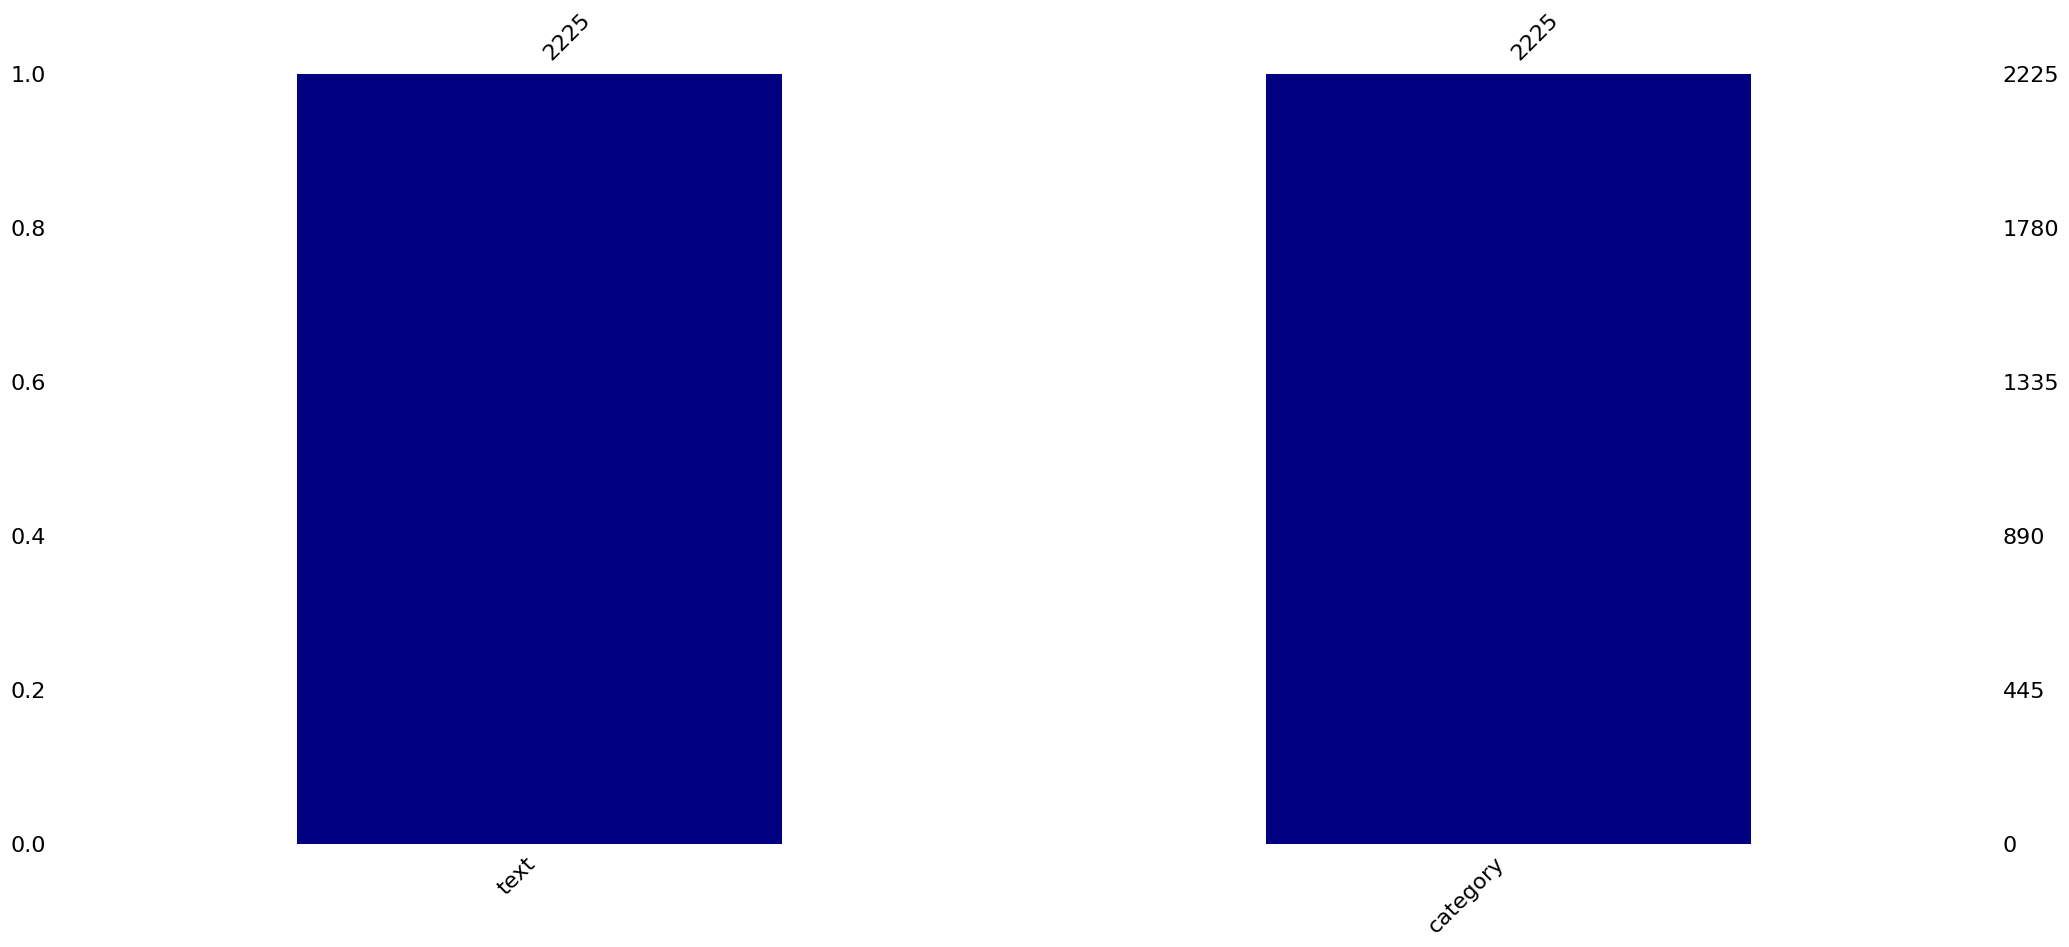

In [3]:
mns.bar(df,color='navy',sort='descending')

In [4]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words_tokens = word_tokenize(text)
    filtered_words = [word for word in words_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['cleaned_text'] = df['text'].apply(remove_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
from collections import Counter
words = ' '.join(df['text'])
wordlist = words.split()

In [6]:
wordcount = Counter(words)
topword = dict(wordcount.most_common(20))
leastword = dict(wordcount.most_common()[:-21:-1])

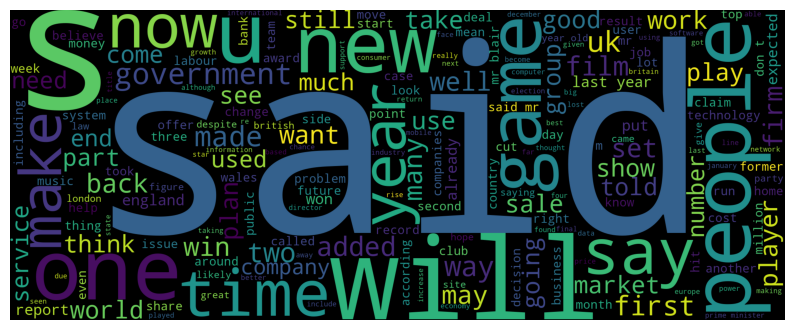

In [7]:
newdata = df[df['category'] == 'tech']
words = ' '.join(df['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

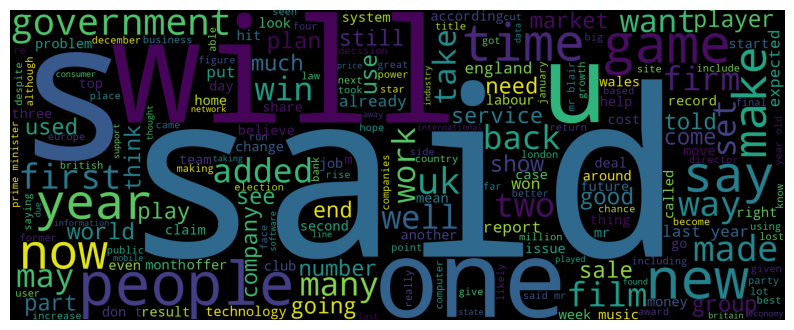

In [8]:
newdata = df[df['category'] == 'business']
words = ' '.join(df['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

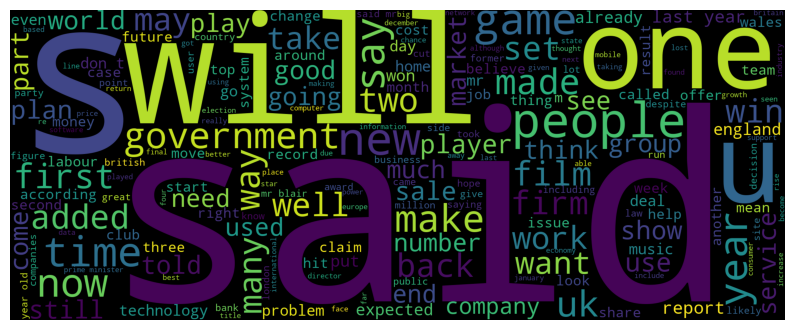

In [9]:
newdata = df[df['category'] == 'sport']
words = ' '.join(df['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

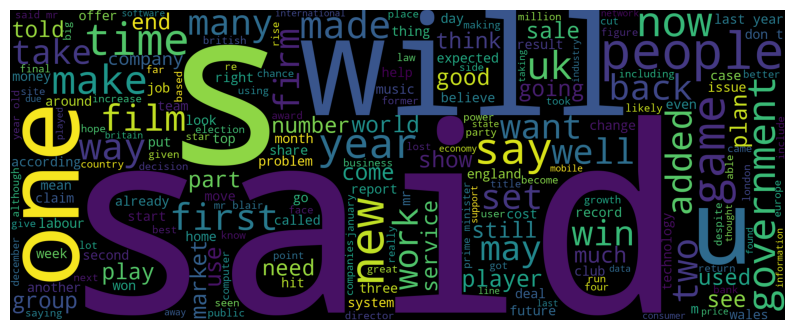

In [10]:
newdata = df[df['category'] == 'entertainment']
words = ' '.join(df['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

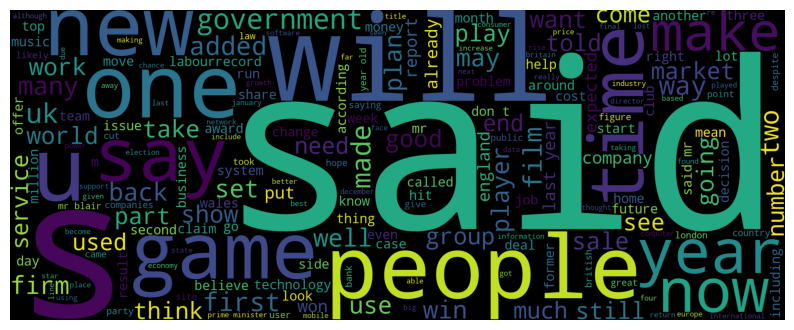

In [11]:
newdata = df[df['category'] == 'politics']
words = ' '.join(df['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='black',width=2000,height=800).generate(cleanword)
plt.figure(1,figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [12]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocessing(x, stem =False):
    x =re.sub(text_cleaning_re, ' ',str(x).lower()).strip()
    tokens = []
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
            return ' '.join(tokens)
df.text = df.text.apply(lambda x: preprocessing(x))

In [13]:
topword

{' ': 933959,
 'e': 482359,
 't': 351397,
 'a': 332689,
 'o': 296356,
 'i': 293295,
 'n': 281000,
 's': 273358,
 'r': 252942,
 'h': 187547,
 'l': 170224,
 'd': 156746,
 'c': 127423,
 'u': 108910,
 'm': 106865,
 'p': 86624,
 'g': 84444,
 'f': 84111,
 'w': 76346,
 'b': 72089}

In [14]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [15]:
df.isnull().sum()

category        0
text            0
cleaned_text    0
dtype: int64

In [16]:
x = df.text
y = df['category']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2,random_state=400)

In [18]:
naivebayes = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',BernoulliNB())])
mlp = Pipeline([('vectorizer',CountVectorizer()),('Transformer',TfidfTransformer()),('Model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [19]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

In [20]:
pred1 = naivebayes.predict(xtest)
pred1

array(['politics', 'sport', 'business', 'sport', 'entertainment',
       'politics', 'tech', 'sport', 'sport', 'sport', 'business',
       'entertainment', 'business', 'politics', 'tech', 'business',
       'entertainment', 'sport', 'politics', 'tech', 'business',
       'business', 'entertainment', 'politics', 'tech', 'sport',
       'business', 'business', 'politics', 'business', 'politics',
       'business', 'sport', 'entertainment', 'sport', 'sport', 'business',
       'tech', 'business', 'business', 'sport', 'business', 'sport',
       'business', 'entertainment', 'sport', 'business', 'entertainment',
       'sport', 'business', 'entertainment', 'business', 'entertainment',
       'business', 'sport', 'sport', 'politics', 'business',
       'entertainment', 'tech', 'business', 'entertainment', 'politics',
       'sport', 'business', 'tech', 'sport', 'politics', 'sport',
       'politics', 'entertainment', 'politics', 'business', 'business',
       'sport', 'tech', 'entertainment'

In [21]:
print(classification_report(ytest,pred1))

               precision    recall  f1-score   support

     business       0.90      0.98      0.94       111
entertainment       0.97      0.91      0.94        77
     politics       0.92      0.93      0.93        73
        sport       1.00      1.00      1.00       112
         tech       0.98      0.90      0.94        72

     accuracy                           0.95       445
    macro avg       0.96      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445

